In [1]:
import numpy as np
from matplotlib import pyplot as plt

from my_lib import grayscale, plot_img, plot_hist
from skimage import io

def bw_histogram(img, cumulative=False, norm=False):
    hist = np.zeros(256)
    for i in range(len(img)):
        for j in range(len(img[0])):
            hist[img[i][j]] += 1

    if cumulative:
        for i in range(1, len(hist)):
            hist[i] += hist[i - 1]

    if norm:
        all = len(img) * len(img[0])
        hist /= all

    return hist

image1 = grayscale(io.imread("bild01.jpg"))
ref_image = grayscale(io.imread("bild02.jpg"))



Was ist eine homogene und was eine nicht-homogene Punktoperation?
homogen: Auf jeden Pixel wird die selbe Funktion angewendet.
nicht-homogen: Verschiedene Pixel / Bildbereiche werden mit unterschiedlichen Funktionen verarbeitet.

Was ist der Unterschied zwischen Punktoperationen und Filteroperationen?
Bei Punktoperationenen dient nur ein einzelner Pixel als Input, bei Filtern wird eine Menge von Pixeln herangezogen, um den neuen Wert eines Pixels zu bestimmen.

[128 106  96  91 143 148 146 146 140 106  74  91  96 123 123 137 111 123
 106 117 133 128 101  85  80  51  63  85  59  74  63  91  96  44  44  63
 101 117 128 133 106  96  96  91  68 101  80  68  51  41  37  51  96 101
  80  80  80  96 101 101 101  80  68  51  59  63  68  74  63  68  63  44
  41  85  85  85  91  96  85  80  74  74  68  59  55  51  51  51  59  68
  68  74  80  85  80  80  85  85  85  91  91  91  91  91  91  91  96  96
  96  96  91  68  68  80 153 172 111  80 159 163 190 188 190 187 175  55
 171 167 128 187 179 194 176 198 199 198 187 200 196 200 200 205 229 201
 201 202 203 226 203 217 220 222 220 220 220 222 220 220 222 220 220 220
 222 222 222 220 220 226 202 205 222 224 222 222 222 222 220 220 222 222
 222 224 222 224 222 222 224 226 217 202 228 220 222 222 220 222 222 222
 222 222 224 224 222 224 222 219 202 219 224 224 224 224 226 224 224 226
 224 224 224 226 226 226 227 226 226 227 227 227 228 228 228 228 227 229
 228 227 227 228 227 228 229 228 227 228 227 228 22

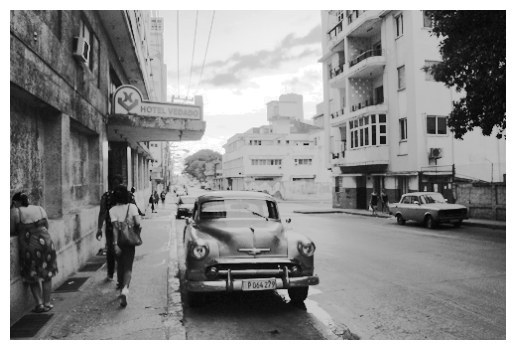

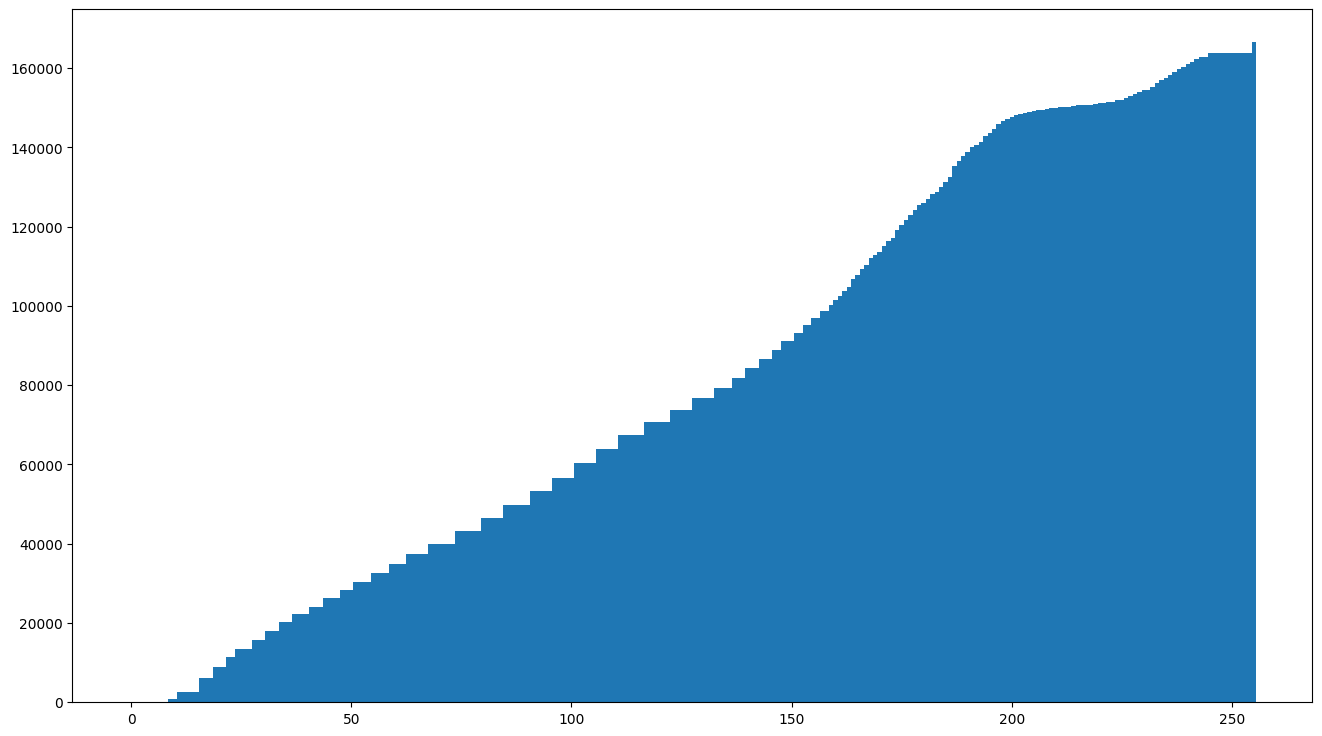

In [17]:
# fhs(a) = min{a′ ∈ [0, K − 1]|PA(a) ≤ PR(a′)}

def adapt_hist2ref(img, ref_img):
    ref_cum_hist = bw_histogram(ref_img, cumulative=True, norm=True)
    img_hist = bw_histogram(img, cumulative=False, norm=True)

    hist_converter = np.zeros(256, dtype=int) # Abbildung Originalhelligkeit auf Neue.
    height = 0
    for i in range(len(img_hist)):
        for j in range(len(ref_cum_hist)):
            if img_hist[i] + height <= ref_cum_hist[j]:
                hist_converter[i] = j
                height += img_hist[i]
                break

    adapted_img = np.zeros((len(img), len(img[0])), dtype=int)
    for i in range(len(img)):
        for j in range(len(img[0])):
            adapted_img[i][j] = hist_converter[img[i][j]]
    return adapted_img

new_img = adapt_hist2ref(image1, ref_image)
for x in new_img:
    print(x)
plot_img(new_img, True)
plot_hist(bw_histogram(new_img, cumulative=True))
